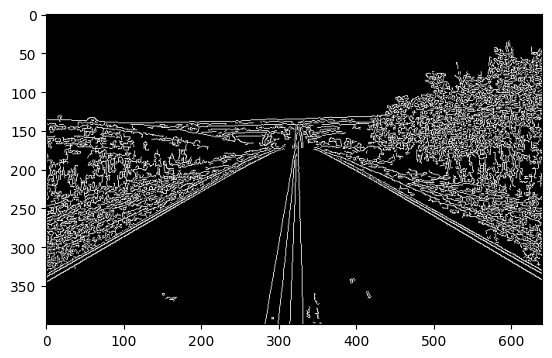

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('lane2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

height, width = edges.shape
roi_vertices = [(0, height), (width / 2, height / 2), (width, height)]
mask = np.zeros_like(edges)

plt.imshow(edges,cmap='gray')

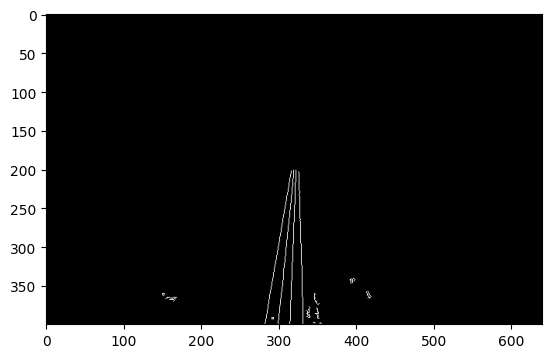

In [50]:
cv2.fillPoly(mask, np.array([roi_vertices], np.int32), 255)
masked_edges = cv2.bitwise_and(edges, mask)

plt.imshow(masked_edges,cmap='gray')

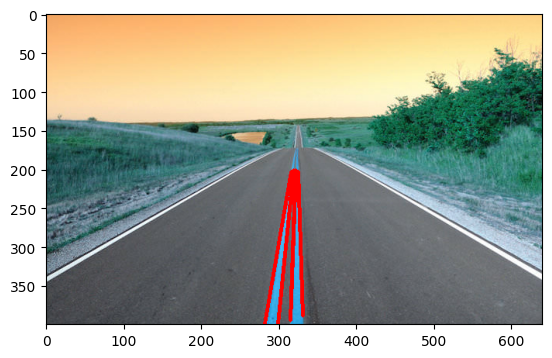

In [51]:
lines = cv2.HoughLinesP(masked_edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.imshow(image)